In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer/Mall_Customers.csv


# Import Packages

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='blue'> 1. Read the dataset and get insights into your data (dataset is attached to this page)

In [4]:
Customer=pd.read_csv('../input/mall-customer/Mall_Customers.csv')

In [5]:
Customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
Customer.shape

(200, 5)

In [7]:
Customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# <font color='blue'> 2. Perform bi-variate data visualization using box plots for the following and explain your inference for each plot

## <font color='blue'> a. Gender vs Spending Score

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

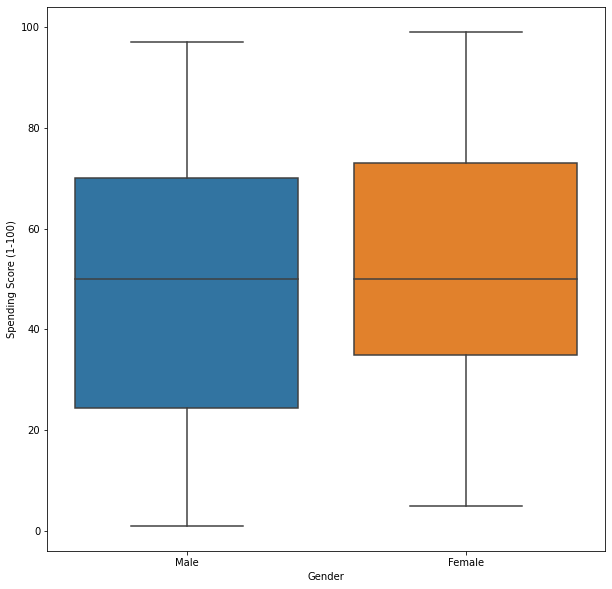

In [8]:
plt.figure(figsize=(10, 10))
sns.boxplot('Gender', 'Spending Score (1-100)', data=Customer)

Females have relatively higher range of spending score.

## <font color='blue'> b. Gender vs Annual Income

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

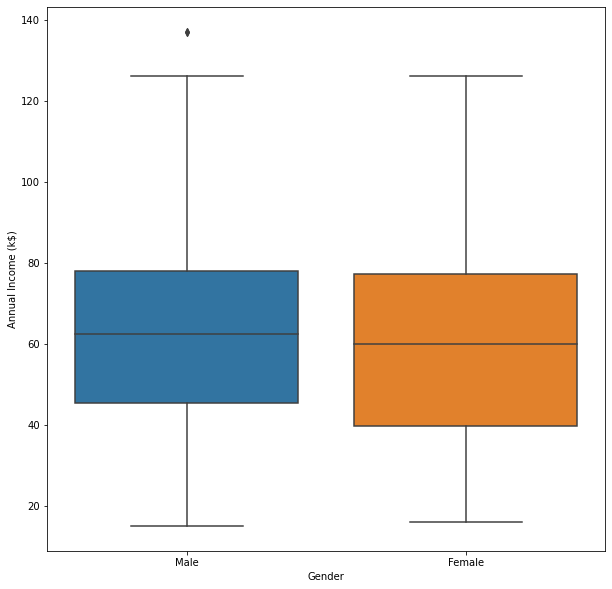

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot('Gender', 'Annual Income (k$)', data=Customer)

The IQR of male are more centered, with an high outlier. The IQR of females are relatively lower than males.

## <font color='blue'> c. Gender vs Age

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='Age'>

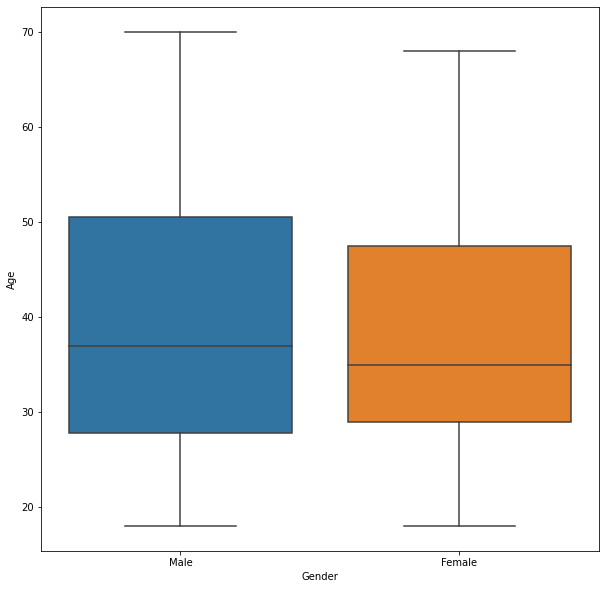

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot('Gender', 'Age', data=Customer)

The centered age of femals are relatively lower than male. The range of females' range is relatively lower than males'.

# <font color='blue'> 3. Use a correlation matrix to identify the correlations between different features, what do you infer from this correlation matrix?

In [11]:
Customer.drop('CustomerID', axis=1, inplace=True)

In [12]:
Customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [13]:
CorrMatrix=Customer.corr()

<AxesSubplot:>

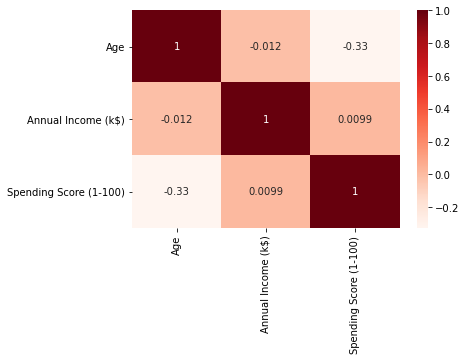

In [14]:
sns.heatmap(CorrMatrix,annot=True, cmap=plt.cm.Reds)

There is a negative correalation between age and spending score. The older the customer, the less s/he spends.

# <font color='blue'> 4. Explain with visualization the % split between Male and Female

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

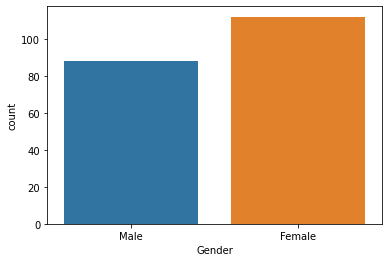

In [15]:
sns.countplot('Gender', data=Customer)

In [16]:
len(Customer[Customer['Gender']=='Female'])/len(Customer)

0.56

56% of the customers are female, which is slighly more than male customers. 

# <font color='blue'> 5. Explain your inference with visualization for frequency of visitors of the mall in terms of

## <font color='blue'> a. Age

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

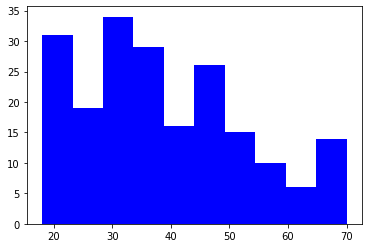

In [17]:
plt.hist('Age', data=Customer, color='blue')

The major age of customers are between 30 to 40, as well as early 20s.

## <font color='blue'> b. Annual Income

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

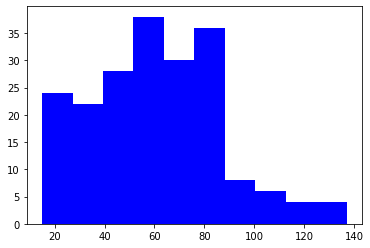

In [18]:
plt.hist('Annual Income (k$)', data=Customer, color='blue')

The annual income is mainly between 40k$ to 85k$.

## <font color='blue'> c. Spending Score

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

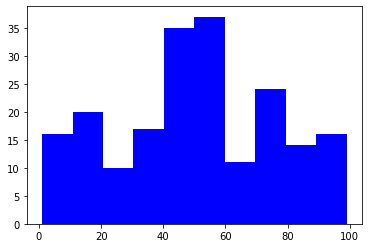

In [19]:
plt.hist('Spending Score (1-100)', data=Customer, color='blue')

The spending score is mainly between 40 to 60. There are also a lot of customer on really high side and really high side.

# <font color='blue'> 6. Convert categorical variables to numerical variables using one hot encoding.

In [20]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# X_enc = Customer['Gender'].copy()
# Customer = Customer.drop('Gender', axis = 1)
# X_enc=le.fit_transform(X_enc)

# Customer = pd.concat([Customer, X_enc], axis = 1)

# Customer

In [21]:
Customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [22]:
# #one hod encoding for categorical features
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()

# # passing bridge-types-cat column (label encoded values of bridge_types)
# enc_df = pd.DataFrame(enc.fit_transform(Customer[['Gender']]).toarray())
# # merge with main df age_df on key values
# Customer_df = Customer.join(enc_df)
# Customer_df.head()
# Customer_df.corr() 

In [23]:
# age_df

In [24]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder=OneHotEncoder(categories='auto')

# Customer['Gender']=onehotencoder.fit_transform(Customer['Gender']).toarray()

In [25]:
def Gender(x):
    if x =='Female':
        return 1
    else:
        return 0

In [26]:
Customer['Gender']=Customer['Gender'].apply(Gender)

In [27]:
Customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


# <font color='blue'> 7. Cluster your data using k-means clustering. Explain how you choose the value of k.

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(2, max_iter=1000)
kmeans.fit(Customer)

KMeans(max_iter=1000, n_clusters=2)

In [29]:
clusters = Customer.copy()
clusters['cluster_pred']=kmeans.fit_predict(Customer)

In [30]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.52293578, 37.60550459, 79.78899083, 50.08256881],
       [ 0.6043956 , 40.34065934, 37.52747253, 50.34065934]])

**Use Elbow method to compute optimal # of clusters**

In [31]:
wcss =[]

max_clusters = 10
for i in range(1,max_clusters):
    kmeans = KMeans(i)
    kmeans.fit(Customer)
    wcss.append(kmeans.inertia_)
    
for index, wcss_val in enumerate(wcss):
    print(f'# of clusters:{index+1} => {wcss_val}')

# of clusters:1 => 308862.06000000006
# of clusters:2 => 212889.44245524294
# of clusters:3 => 143391.59236035674
# of clusters:4 => 104414.67534220174
# of clusters:5 => 75528.58656469136
# of clusters:6 => 58348.64136331505
# of clusters:7 => 51130.690081263754
# of clusters:8 => 44389.80767355767
# of clusters:9 => 40891.680830865036


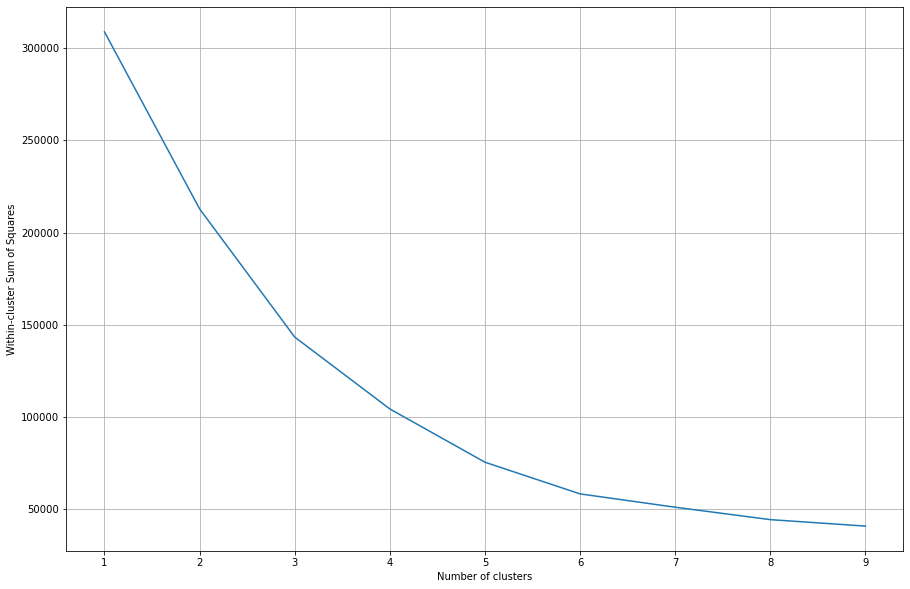

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(range(1,max_clusters),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.grid()

I choose k=5 based on the elbow test.

In [33]:
kmeans_new = KMeans(5, max_iter=1000)
kmeans_new.fit(Customer)
clusters_new = Customer.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(Customer)

In [34]:
clusters_new.cluster_pred.value_counts()

1    79
2    39
0    36
3    23
4    23
Name: cluster_pred, dtype: int64

# <font color='blue'> 8. Explain each of your clusters in terms of all its attributes (use visualizations to explain better).

In [35]:
Customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


Text(0.5, 1.0, 'Age vs Spending Score')

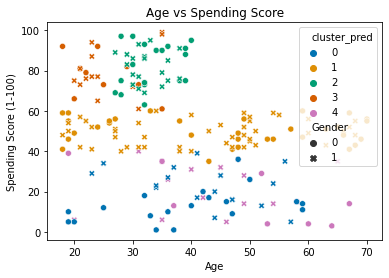

In [36]:
sns.scatterplot(data=clusters_new, x='Age', y='Spending Score (1-100)', hue='cluster_pred', style='Gender', palette='colorblind')
plt.title('Age vs Spending Score')

Text(0.5, 1.0, 'Age vs Annual Income')

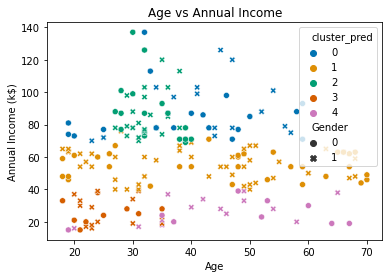

In [37]:
sns.scatterplot(data=clusters_new, x='Age', y='Annual Income (k$)', hue='cluster_pred', style= 'Gender',  palette='colorblind')
plt.title('Age vs Annual Income')

0- poor Kids

1- Middel Class

2- Rich

3- Lower income class--not target

4- Young Rich people

Text(0.5, 1.0, 'Annual Income vs Spending Score')

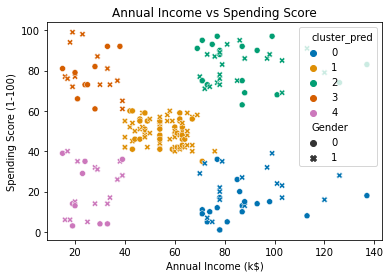

In [38]:
sns.scatterplot(data=clusters_new, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_pred', style='Gender', palette='colorblind')
plt.title('Annual Income vs Spending Score')

**0- Irrational consumer--Target**

1- Rational Consumer

2- Temperate Consumer

3- Short of Money Consumer

**4- Rich Consumer--Target**

The cluster can be mostly divided with annual income and spending score. Gender does not distinguish much.

The target should be customers that have high spending score with low annual income (irrational customer) and high spending score with highn annual income (rich customer)